In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from numpy import floor
from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt                            
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve


import warnings
warnings.simplefilter(action='ignore')

In [3]:
pwd

'C:\\Users\\Manish'

In [4]:
hr_df = pd.read_excel("C:\\Users\\Manish\\HR_comma_sep.xlsx")
hr_df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,salary_num
0,0.38,0.53,2,157,3,0,1,0,sales,low,4649
1,0.80,0.86,5,262,6,0,1,0,sales,medium,34126
2,0.11,0.88,7,272,4,0,1,0,sales,medium,40522
3,0.72,0.87,5,223,5,0,1,0,sales,low,6916
4,0.37,0.52,2,159,3,0,1,0,sales,low,10928
...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low,5089
14995,0.37,0.48,2,160,3,0,1,0,support,low,4001
14996,0.37,0.53,2,143,3,0,1,0,support,low,12842
14997,0.11,0.96,6,280,4,0,1,0,support,low,8849


In [5]:
print('The number of samples in data is {}.'.format(hr_df.shape[0]))

The number of samples in data is 14999.


In [6]:
hr_df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
salary_num                 int64
dtype: object

In [7]:
hr_df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_num
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,30085.475432
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,33465.313560
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,1.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,10334.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,20875.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,38186.500000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,199768.000000


# TASK - 1

In [8]:
import seaborn as sns

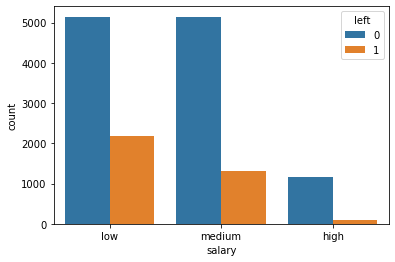

In [9]:
sns.countplot(x="salary",hue='left',data=hr_df)
plt.show()

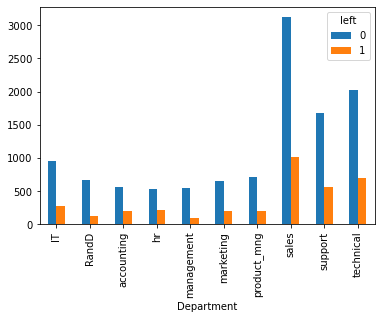

In [11]:
pd.crosstab(hr_df.Department,hr_df.left).plot(kind='bar')
plt.show()

# TASK - 2

In [12]:
hr_df[hr_df.isnull().any(axis=1)]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,salary_num


In [13]:
column_correlation = hr_df.corr()
column_correlation

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_num
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.046656
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,-0.022006
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,-0.007598
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,-0.006997
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,0.047869
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.006091
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.140561
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,0.091209
salary_num,0.046656,-0.022006,-0.007598,-0.006997,0.047869,0.006091,-0.140561,0.091209,1.000000


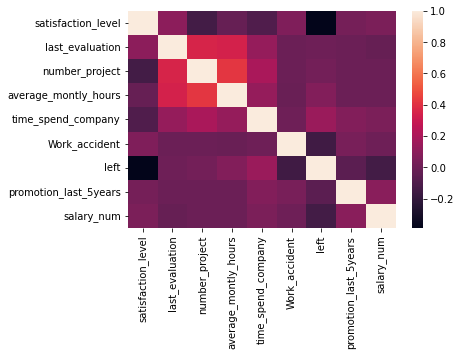

In [14]:
import seaborn as sns

sns.heatmap(column_correlation);
plt.show()

In [28]:
surviver_encoder = preprocessing.LabelEncoder()

surviver_encoder.fit(hr_df.salary)          
print(surviver_encoder.classes_)
hr_df.salary = surviver_encoder.transform(hr_df.salary)


[0 1 2]


In [27]:
surviver_encoder = preprocessing.LabelEncoder()

surviver_encoder.fit(hr_df.Department)
print(surviver_encoder.classes_)
hr_df.Department = surviver_encoder.transform(hr_df.Department)


[0 1 2 3 4 5 6 7 8 9]


In [29]:
hr_df['Department']=hr_df.Department.astype('category')
dept_dummy=pd.get_dummies(hr_df.Department,prefix="department")
d_hr_df=pd.concat([hr_df,dept_dummy],axis='columns')
d_hr_df.drop('Department',axis='columns',inplace=True)
d_hr_df.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,salary_num,department_0,department_1,department_2,department_3,department_4,department_5,department_6,department_7,department_8,department_9
0,0.38,0.53,2,157,3,0,1,0,1,4649,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,2,34126,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,2,40522,0,0,0,0,0,0,0,1,0,0


In [30]:
d_train,d_test=train_test_split(d_hr_df,train_size=0.70)
d_ind_train=d_train.drop(columns='salary_num',axis=1)
d_dep_train=d_train['salary_num']
d_ind_test=d_test.drop(columns='salary_num', axis=1)
d_dep_test=d_test['salary_num']

In [31]:
d_model=DecisionTreeRegressor(max_depth=4)
d_model.fit(d_ind_train,d_dep_train)
d_Prediction=d_model.predict(d_ind_test)                
print('Prediction :\n',d_Prediction)
print(f'R^2 Score of Training Dataset : {round(d_model.score(d_ind_train, d_dep_train)*100,2)} %')

Prediction :
 [34971.97464866  9956.56199305 34971.97464866 ...  9956.56199305
 34971.97464866  9650.26595745]
R^2 Score of Training Dataset : 82.42 %


# TASK - 3 

In [22]:
feature_cols=['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company',
             'Work_accident','promotion_last_5years','Department','salary','salary_num']
X=hr_df[feature_cols]
y=hr_df.left
hr_df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,salary_num
0,0.38,0.53,2,157,3,0,1,0,7,1,4649
1,0.80,0.86,5,262,6,0,1,0,7,2,34126
2,0.11,0.88,7,272,4,0,1,0,7,2,40522
3,0.72,0.87,5,223,5,0,1,0,7,1,6916
4,0.37,0.52,2,159,3,0,1,0,7,1,10928
...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,8,1,5089
14995,0.37,0.48,2,160,3,0,1,0,8,1,4001
14996,0.37,0.53,2,143,3,0,1,0,8,1,12842
14997,0.11,0.96,6,280,4,0,1,0,8,1,8849


In [23]:
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [24]:
clf=DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy :",metrics.accuracy_score(y_test,y_pred))

Accuracy : 0.9517777777777777


In [25]:
confusion_matrix(y_test,y_pred)

array([[3294,  122],
       [  95,  989]], dtype=int64)

In [26]:
print('Accuracy :',accuracy_score(y_test,y_pred))
print('recall :', recall_score(y_test,y_pred,average='weighted'))
print('f1-score :', f1_score(y_test,y_pred, average='weighted'))
print('precision :',precision_score(y_test,y_pred))

Accuracy : 0.9517777777777777
recall : 0.9517777777777777
f1-score : 0.9519786959690447
precision : 0.8901890189018902


In [27]:
dtm = DecisionTreeRegressor(max_depth=4,
                           min_samples_split=5,
                           max_leaf_nodes=10)

dtm.fit(X_train,y_train)
print("R-Squared on train dataset={}".format(dtm.score(X_test,y_test)))

dtm.fit(X_test,y_test)   
print("R-Squaredon test dataset={}".format(dtm.score(X_test,y_test)))

R-Squared on train dataset=0.827501551143308
R-Squaredon test dataset=0.8368165271051635


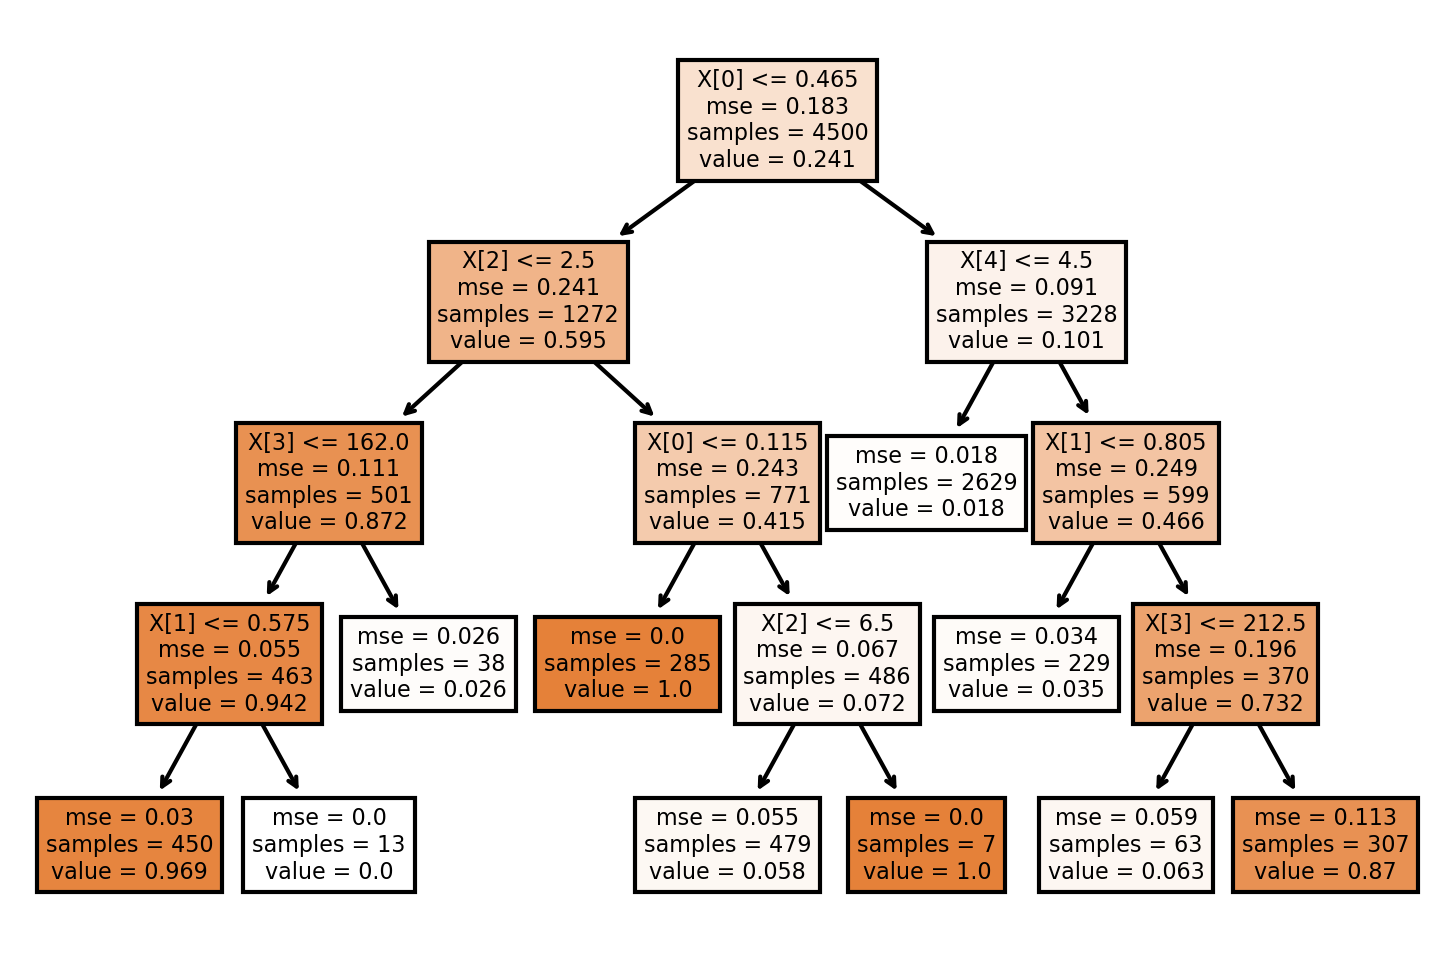

In [28]:
fig, axes = plt.subplots(dpi=300)

tree.plot_tree(dtm,
           filled = True);

fig.savefig('HR_comma_sep_decisiontree.png')

# TASK - 4

In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[3294,  122],
       [  95,  989]], dtype=int64)

In [30]:
print('accuracy:', accuracy_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred, average='weighted'))
print('f1-score:', f1_score(y_test, y_pred, average='weighted'))
print('precision:', precision_score(y_test, y_pred))

accuracy: 0.9517777777777777
recall: 0.9517777777777777
f1-score: 0.9519786959690447
precision: 0.8901890189018902


In [31]:
hr_train, hr_test = train_test_split(hr_df,train_size = 0.7)

print('Size of training dataset: ', hr_train.shape)
print('Size of test dataset: ', hr_test.shape)

Size of training dataset:  (10499, 11)
Size of test dataset:  (4500, 11)


In [32]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

76.08

In [33]:
X_train = hr_train.drop(columns='left', axis =1)
Y_train = hr_train['left']
X_test = hr_test.drop(columns='left', axis =1)
Y_test = hr_test['left']
X_train.shape, y_train.shape, X_test.shape                                  

((10499, 10), (10499,), (4500, 10))

In [34]:
coeff_df = pd.DataFrame(hr_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)



,Feature,Correlation
4,Work_accident,0.110695
9,salary_num,-0.000019
3,time_spend_company,-0.000993
6,promotion_last_5years,-0.006792
1,number_project,-0.016923
8,salary,-0.037707
5,left,-0.051014
2,average_montly_hours,-0.053148
7,Department,-0.084558
0,last_evaluation,-0.098416


In [35]:
logreg.intercept_

array([-0.02629028])

In [36]:
logreg.score(X_test, y_test)

0.7577777777777778

In [37]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [38]:
roc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])
roc

0.4812830007691178

In [39]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

auc = roc_auc_score(y_test, y_pred)
print('AUC: %.3f' % auc)

AUC: 0.499


In [40]:
ns_probs = [0 for _ in range(len(y_test))]

In [41]:
lr_probs = logreg.predict_proba(X_test)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.481


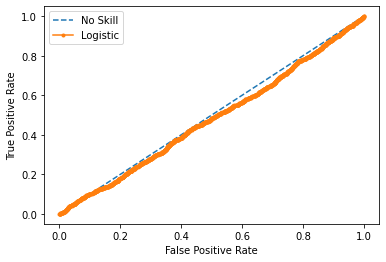

In [42]:
lr_probs = lr_probs[:, 1]

ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

# TASK - 5

In [43]:
feature_cols=['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company',
             'Work_accident','promotion_last_5years','Department','salary_num','left']
x=hr_df[feature_cols]
Y=hr_df.salary

In [44]:
x_train, x_test,Y_train, Y_test=train_test_split(x,Y,test_size=0.3,random_state=1)

In [45]:
clf=DecisionTreeClassifier(max_depth=3)
clf = clf.fit(x_train,Y_train)
Y_pred=clf.predict(x_test)
print("Accuracy :",metrics.accuracy_score(Y_test,Y_pred))

Accuracy : 0.9997777777777778


In [46]:
confusion_matrix(Y_test,Y_pred)

array([[ 370,    0,    0],
       [   0, 2227,    0],
       [   0,    1, 1902]], dtype=int64)

In [47]:
print('Accuracy :',accuracy_score(Y_test,Y_pred))
print('recall :', recall_score(Y_test,Y_pred,average='weighted'))
print('f1-score :', f1_score(Y_test,Y_pred, average='weighted'))
print('precision :',precision_score(Y_test,Y_pred,average='weighted'))

Accuracy : 0.9997777777777778
recall : 0.9997777777777778
f1-score : 0.9997777735172001
precision : 0.999777877518452


In [48]:
dtm = DecisionTreeRegressor(max_depth=4,
                           min_samples_split=5,
                           max_leaf_nodes=10)

dtm.fit(x_train,Y_train)
print("R-Squared on train dataset={}".format(dtm.score(x_test,Y_test)))

dtm.fit(x_test,Y_test)   
print("R-Squared on test dataset={}".format(dtm.score(x_test,Y_test)))

R-Squared on train dataset=0.9994288188316146
R-Squared on test dataset=1.0


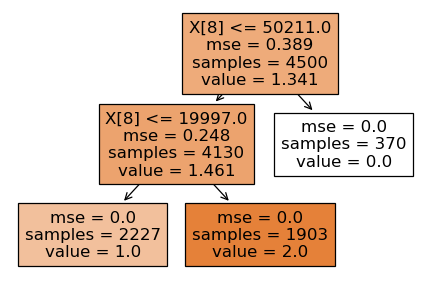

In [49]:
fig, axes = plt.subplots(dpi=90)

tree.plot_tree(dtm,
           filled = True);

fig.savefig('HR_comma_sep_decisiontree.png')